# Algoritmos de busqueda

## Preparacion de datos

### Importar librerias

In [2]:
import networkx as nx #Libreria de redes
import matplotlib.pyplot as plt #libreira para plotear
import pandas as pd #libreria de maneo de datos
import scipy as sp #libreria oython cientifico
import numpy as np #libreira manejo de matrices
import random #generador de elecciones aleatorias
import operator #operador

### Creacion de Dataframe, red y caracterisitcas

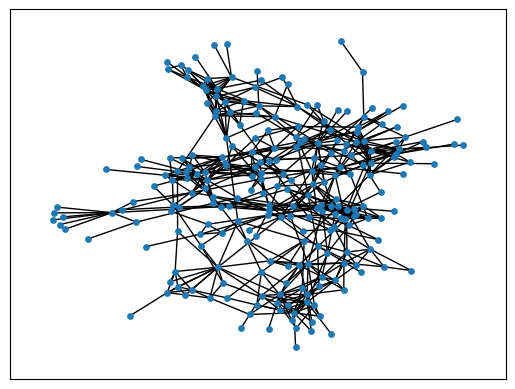

In [8]:
Redani=pd.read_csv("CN_spa.csv",header=None,sep=",") #importar dataframe, lista de enlaces
G = nx.from_pandas_edgelist(Redani,source=0,target=1) #Red
grafo=nx.draw_networkx(G,with_labels=False,node_size=15)#Dibujar la red
plt.show()

In [12]:
print("numero de nodos:",G.number_of_nodes(), "numero de enlaces:",G.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


In [10]:
#matriz de adyacencia
adyacencia=nx.adjacency_matrix(G).todense()
#dataframe de la matriz de adyacencia
DFadj=pd.DataFrame(adyacencia)
DFadj.to_csv('adjacencymatrix.csv')

Una vez creada la matriz de adyacencia, esta deja de tener los nombre de los nodos y se convierte en una matriz numerica, esto facilita el trabajo posterior por que no hay necesidad de preocuparse por los string, cada nodo es asignado por un numero.

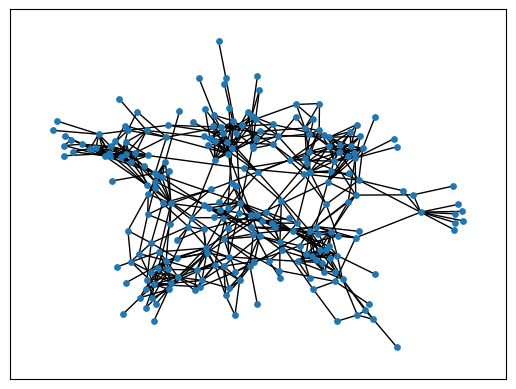

In [3]:
DFsec=pd.read_csv("adjacencymatrix.csv",header=None)
p1=DFsec.drop([0],axis=0) #elimina la columna de cabecera
p2=p1.drop([0],axis=1) #elimina la fila de cabecera
Pg=nx.from_pandas_adjacency(p2)
G1 = nx.from_pandas_adjacency(p2)
grafo=nx.draw_networkx(G1,with_labels=False,node_size=15)

In [13]:
print("numero de nodos:",G1.number_of_nodes(), "numero de enlaces:",G1.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


### Tamaño de cluster

In [16]:
#tamaño de cluster
clustersize=nx.average_clustering(G)
clustersize

0.3296154175391464

### Distribucion de grado para la red de numeros

In [22]:
degree=nx.degree(G1)
degree1=pd.DataFrame(degree)
#listdegree1=list(degree)
#degree2=pd.DataFrame(listdegree1, dtype = np.float64)
degree1

,0,1
0,236,5
1,235,4
2,234,7
3,233,1
4,232,12
...,...,...
231,5,10
232,4,2
233,3,14
234,2,3


### Distribucion de grados para la red animal

In [23]:
degreeani=nx.degree(G)
degree1ani=pd.DataFrame(degreeani)
#listdegree1ani=list(degreeani)
#degree2ani=pd.DataFrame(listdegree1ani, dtype = np.float64)
degree1ani

,0,1
0,abeja,8
1,abejorro,3
2,aguila,14
3,aguilucho,2
4,arana,10
...,...,...
231,vaca,12
232,verderol,1
233,vibora,7
234,yegua,4


### Grado medio

In [25]:
#Grado medio
meandegree=np.mean(degree1.iloc[:,1])
meandegree

5.177966101694915

### Frecuencias de grado

In [26]:
pd.value_counts(degree1.iloc[:,1])

1     38
4     32
2     28
3     24
6     22
5     19
7     17
8     14
9     11
10    10
14     9
12     5
11     4
13     2
15     1
Name: 1, dtype: int64

## BUSQUEDA POR GRADO DE NODO NDS

In [17]:
#funcion de busqueda
"""def walked_nodes_by_degree_prob(network,nodo):
    nodes = list(network.nodes())
    current_node = nodo
    walked_nodes = [current_node]
    while len(walked_nodes) < len(nodes)+1:
        neighbors = list(network.neighbors(current_node))
        neighbor_degrees = [network.degree(node) for node in neighbors]
        probabilities = [degree/sum(neighbor_degrees) for degree in neighbor_degrees]
        next_node = random.choices(neighbors, weights=probabilities)[0]
        walked_nodes.append(next_node)
        current_node = next_node
    return walked_nodes"""

'def walked_nodes_by_degree_prob(network,nodo):\n    nodes = list(network.nodes())\n    current_node = nodo\n    walked_nodes = [current_node]\n    while len(walked_nodes) < len(nodes):\n        neighbors = list(network.neighbors(current_node))\n        neighbor_degrees = [network.degree(node) for node in neighbors]\n        probabilities = [degree/sum(neighbor_degrees) for degree in neighbor_degrees]\n        next_node = random.choices(neighbors, weights=probabilities)[0]\n        walked_nodes.append(next_node)\n        current_node = next_node\n    return walked_nodes'

In [56]:
#funcion de busqueda
def walked_nodes_by_degree_prob(network,nodo):
    nodes = list(network.nodes())
    current_node = nodo
    walked_nodes = [current_node]
    while len(walked_nodes) < 10: #nx.number_of_nodes(G1)
        neighbors = list(network.neighbors(current_node))
        neighbor_degrees = [network.degree(node) for node in neighbors]
        probabilities = [degree/sum(neighbor_degrees) for degree in neighbor_degrees]
        next_node = random.choices(neighbors, weights=probabilities)[0]
        walked_nodes.append(next_node)
        current_node = next_node
    return walked_nodes

In [78]:
count=1
i=1 #contador
matrix=[] #matriz de resultados
while i < 10: #ciclo que crea la matriz nx.number_of_nodes(G1)
    while count < 10+1: #ciclo que recorre la red nx.number_of_nodes(G1)+1
        pp=walked_nodes_by_degree_prob(G1,count)
        count+=1
        matrix.append(pp) #añade las listas a la matriz
        i+=1
newmatrix=np.delete(matrix,0,axis=1) #quita la primera columna
arreglouni=np.ravel(newmatrix)#convierte la mattriz a un arreglo unidimension
valores,frecuencia=np.unique(arreglouni,return_counts=True)#cal val,frec
tabla=[valores,frecuencia]#tabula
dataf=pd.DataFrame(tabla)#dataframe
matrixDF=pd.DataFrame(matrix)
matrixDF.to_csv("matrizF.csv")
print(dataf)

   0   1   2   3   4   5   6   7   8   9   ...   20   21   22   23   24   25  \
0   1   5   7   9  17  29  40  50  60  86  ...  146  156  181  192  210  214   
1   1   1   1   1   2   2   1   1   1   1  ...    1    1    1    1    1    1   

    26   27   28   29  
0  216  222  228  234  
1    1    1    2    1  

[2 rows x 30 columns]


In [79]:
unique_values, counts = np.unique(matrix, return_counts=True)
unique_values,counts



(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  17,  29,  40,
         50,  60,  86,  92,  99, 128, 133, 134, 135, 136, 138, 139, 141,
        146, 156, 181, 192, 210, 214, 216, 222, 228, 234]),
 array([2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1,
        1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]))

In [80]:
elementoi=unique_values
arreglo=list(G.nodes())
palabra=[]
for elemeto in elementoi:
   palabra.append(arreglo[elemeto])
listapalabra=np.reshape(palabra,(1,-1))
frecuenciapalabra=[listapalabra,counts]

Text(0, 0.5, 'Frecuencia')

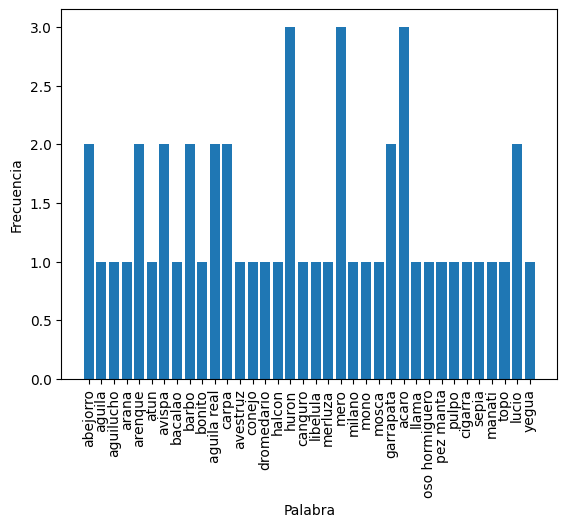

In [81]:
plt.bar(palabra,counts,)
plt.xlabel("Palabra")
plt.xticks(rotation=90)
plt.ylabel("Frecuencia")

## BUSQUEDA PROFUNDA PRIMERO BASADA EN CLUSTERING CbDFS

In [4]:
clustering_coefficients = nx.clustering(G1)

# Agrupar los nodos según su coeficiente de clustering
clusters = {}
for node, coefficient in clustering_coefficients.items():
    if coefficient not in clusters:
        clusters[coefficient] = []
    clusters[coefficient].append(node)

# Convertir los clusters en una lista de listas de nodos
cluster_list = [v for k, v in clusters.items()]

# Imprimir los clusters
print(cluster_list)

[[236, 161], [235, 24], [234, 165], [233, 231, 230, 229, 226, 225, 223, 218, 217, 213, 212, 211, 208, 205, 203, 202, 201, 191, 187, 184, 172, 171, 168, 166, 163, 157, 154, 153, 151, 147, 143, 142, 127, 126, 124, 119, 105, 101, 93, 90, 82, 78, 77, 75, 71, 65, 63, 61, 53, 44, 39, 37, 32, 30, 18, 12, 6], [232], [228, 224], [227, 196, 183, 123, 59, 55, 25], [222], [221], [220, 73], [219, 206, 188, 181, 178, 174, 159, 136, 131, 121, 120, 117, 108, 80, 69, 56, 54, 35, 9, 4, 2], [216, 3], [215, 198, 197, 190, 182, 173, 148, 145, 138, 135, 133, 132, 125, 115, 109, 89, 85, 84, 76, 70, 64, 60, 50, 48, 45, 28, 27, 26, 16, 10], [214], [210], [209, 176, 58], [207, 200, 164, 158, 116, 102, 79, 67, 66], [204], [199, 114, 98, 41, 21], [195, 186, 155, 149, 144, 140, 110, 33, 19, 13], [194, 103], [193, 179, 175, 122], [192, 36], [189, 177, 150, 112, 88, 81, 46, 11], [185, 87, 42], [180], [170, 99, 74], [169, 152, 15], [167], [162], [160, 130, 129, 52, 31], [156], [146], [141], [139], [137], [134], [128]